<a href="https://colab.research.google.com/github/farsashraf/OOP/blob/main/k_keans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [483]:
import pandas as pd
import numpy as np
import seaborn as sns

In [484]:
data = pd.read_csv("survey.csv")
data.head()

,Unnamed: 0,age,Sex,location,What is the amount of your preference for religious and structural donations (for%),What is the amount of your preference for health donations (for%),What is the amount of your preference for educational donations (for%),What is your preference for social donations (for%),What is the amount of your preference to donate charities (for%),What is the amount of your preference to donate money (cash) (for%),What is the amount of your preference to donate physical things (for%),What is your preference for volunteering to work with charitable organizations (for%),What is your average monthly income
0,Ahmed Roma,23,male,Damietta,100,60,100,60,100,100,100,60,2500
1,Faris Abuid,22,male,Damietta,20,60,60,100,40,80,40,0,3000
2,Mustafa Reda Ibrahim Dura,22,male,Damietta,60,100,40,60,40,40,60,40,1500
3,#VALUE!,19,feminine,Damietta,100,80,100,60,40,100,100,100,1500
4,👍🏻,23,feminine,Menoufia,80,20,60,80,40,40,80,80,300


In [485]:
cols_name =['name', 'age', 'Sex', 'location','pref_religious','pref_health', 'pref_education', 'pref_social', 'pref_charities', 'pref_cash','pref_things','pref_volunteer','income' ]
data.columns =cols_name
data.head()

,name,age,Sex,location,pref_religious,pref_health,pref_education,pref_social,pref_charities,pref_cash,pref_things,pref_volunteer,income
0,Ahmed Roma,23,male,Damietta,100,60,100,60,100,100,100,60,2500
1,Faris Abuid,22,male,Damietta,20,60,60,100,40,80,40,0,3000
2,Mustafa Reda Ibrahim Dura,22,male,Damietta,60,100,40,60,40,40,60,40,1500
3,#VALUE!,19,feminine,Damietta,100,80,100,60,40,100,100,100,1500
4,👍🏻,23,feminine,Menoufia,80,20,60,80,40,40,80,80,300


In [486]:
data.drop(['name', 'income'], axis= 1, inplace= True)
data.head()

,age,Sex,location,pref_religious,pref_health,pref_education,pref_social,pref_charities,pref_cash,pref_things,pref_volunteer
0,23,male,Damietta,100,60,100,60,100,100,100,60
1,22,male,Damietta,20,60,60,100,40,80,40,0
2,22,male,Damietta,60,100,40,60,40,40,60,40
3,19,feminine,Damietta,100,80,100,60,40,100,100,100
4,23,feminine,Menoufia,80,20,60,80,40,40,80,80


In [487]:
data.shape
len(data)

278

In [488]:
data.isnull().sum()

age               0
Sex               0
location          0
pref_religious    0
pref_health       0
pref_education    0
pref_social       0
pref_charities    0
pref_cash         0
pref_things       0
pref_volunteer    0
dtype: int64

In [489]:
data.describe()

,age,pref_religious,pref_health,pref_education,pref_social,pref_charities,pref_cash,pref_things,pref_volunteer
count,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.00000,278.000000,278.000000
mean,34.169065,58.507194,63.298561,54.507194,60.723022,55.557554,62.07554,57.859712,51.284173
std,17.261950,31.633020,29.868800,30.443383,28.411727,29.924971,29.98829,29.342957,32.811052
min,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,21.000000,33.000000,40.000000,30.000000,40.000000,30.000000,40.00000,32.000000,20.000000
50%,25.000000,61.500000,70.000000,58.000000,61.000000,60.000000,64.00000,60.000000,55.000000
75%,46.000000,80.000000,90.000000,80.000000,80.000000,80.000000,89.25000,80.000000,80.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000


In [490]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
x = data
ct  = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), [1, 2])])
x_train =ct.fit_transform(x)

In [491]:
from sklearn.preprocessing import MaxAbsScaler
from scipy.sparse import csr_matrix

n_data = x_train
scaler = MaxAbsScaler()
normalized_data = scaler.fit_transform(n_data)

In [492]:
df_normalized = pd.DataFrame(normalized_data.toarray())
df_normalized.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [493]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

def elbow_method(data1, max_k):
    means= []
    inertias= []
    for k in range(1, max_k):
      km = KMeans(n_clusters=k)
      km.fit(data1)
      means.append(k)
      inertias.append(km.inertia_)

    fig = plt.subplots(figsize =(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('number of clusters')
    plt.ylabel('inertia')
    plt.grid(True)
    plt.show

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

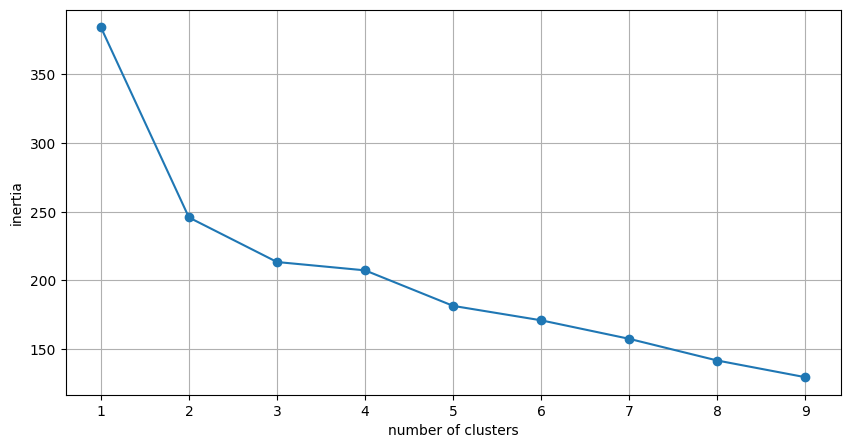

In [494]:
elbow_method(df_normalized, 10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


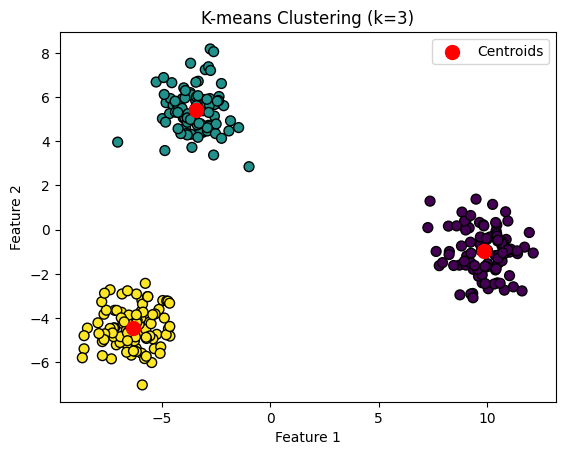

In [495]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

df_normalized, labels = make_blobs(n_samples=len(data), centers=3,random_state=42 )
pca = PCA()
x_pca = pca.fit_transform(df_normalized)

kmeans = KMeans(n_clusters=3, init='k-means++',  max_iter=500, random_state=42)
kmeans.fit(x_pca)

cluster_labels = kmeans.labels_
plt.scatter(x_pca[:, 0], x_pca[:, 1], c = cluster_labels, cmap ='viridis', edgecolors='k', s =50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='o', s=100, label='Centroids')
plt.title('K-means Clustering (k=3)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [496]:
pca.explained_variance_ratio_

array([0.74098427, 0.25901573])

In [497]:
from sklearn.metrics import silhouette_score
result = kmeans.labels_
print(silhouette_score(df_normalized, result))

0.850072413790491


In [498]:
labels = kmeans.labels_
data['cluster'] = kmeans.labels_
data.head()

,age,Sex,location,pref_religious,pref_health,pref_education,pref_social,pref_charities,pref_cash,pref_things,pref_volunteer,cluster
0,23,male,Damietta,100,60,100,60,100,100,100,60,2
1,22,male,Damietta,20,60,60,100,40,80,40,0,2
2,22,male,Damietta,60,100,40,60,40,40,60,40,2
3,19,feminine,Damietta,100,80,100,60,40,100,100,100,1
4,23,feminine,Menoufia,80,20,60,80,40,40,80,80,0


In [499]:
def analyze_preferences(cluster_data):
  num_sample = len(cluster_data)
  preferences =np.mean(cluster_data, axis = 0)
  return preferences

  cluster_preferences = {}
for cluster_labels in set(labels):
  cluster_data = data[labels == cluster_labels]
  cluster_preferences[cluster_labels] = analyze_preferences(cluster_data)

  for cluster_label, preferences in cluster_preferences.items():
    print(f'Cluster {cluster_label} Preferences:\n{preferences}')


Cluster 0 Preferences:
age               34.032609
pref_religious    60.239130
pref_health       62.130435
pref_education    57.510870
pref_social       63.804348
pref_charities    56.130435
pref_cash         63.010870
pref_things       57.847826
pref_volunteer    51.663043
cluster            0.000000
dtype: float64
Cluster 1 Preferences:
age               34.612903
pref_religious    60.559140
pref_health       63.096774
pref_education    54.612903
pref_social       60.451613
pref_charities    56.397849
pref_cash         57.602151
pref_things       57.333333
pref_volunteer    48.666667
cluster            1.000000
dtype: float64
Cluster 2 Preferences:
age               33.860215
pref_religious    54.741935
pref_health       64.655914
pref_education    51.430108
pref_social       57.946237
pref_charities    54.150538
pref_cash         65.623656
pref_things       58.397849
pref_volunteer    53.526882
cluster            2.000000
dtype: float64
Cluster 3 Preferences:
age               27.76

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default